# Assignment 2 - Swarm Intelligence

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits import mplot3d

## Seed

In [2]:
np.random.seed(0)

## Exercise 2 - PSO

In [3]:
# Function to minimize
def f(x):
    return x**2

In [4]:
# Function to calculate pso
def execute_pso_algorithm(x, v, w, a1, a2, r1, r2):
    x_hist = [x]
    
    personal_best = 0
    global_best = 0
    
    for i in range(1, 100):
        v = (w * v) + (a1 * r1 * (personal_best - x)) + (a2 * r2 * (global_best - x))
        x = x + v
        
        if i == 1:
            personal_best = x
            global_best = x
            
        personal_best = x if f(x) < f(personal_best) else personal_best
        global_best = x if f(x) < f(global_best) else global_best
        
        x_hist.append(x)
    
    return x_hist

In [5]:
# First settings
x = 20
v = 10
ω = 0.5
α1 = α2 = 1.5
r1 = r2 = 0.5

In [6]:
# Calculate pso based on the first settings
first_setting_res = execute_pso_algorithm(x, v, ω, α1, α2, r1, r2)

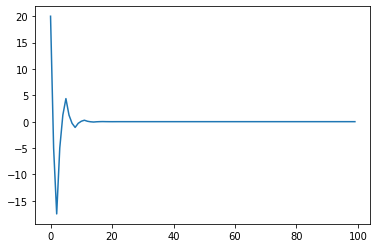

In [7]:
# Show pso in plot
plt.figure()
plt.plot(first_setting_res)
plt.show()

In [8]:
# Second settings
x = 20
v = 10
ω = 0.7
α1 = α2 = 1.5
r1 = r2 = 1

In [9]:
# Calculate pso based on the second settings
second_setting_res = execute_pso_algorithm(x, v, ω, α1, α2, r1, r2)

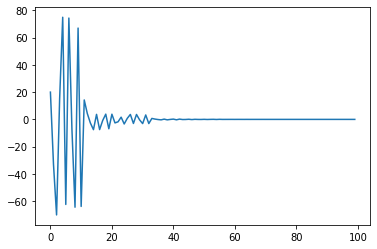

In [10]:
# Show pso in plot
plt.figure()
plt.plot(second_setting_res)
plt.show()

## Exercise 3 - PSO

#### Helper Functions

In [11]:
def distance(z, m):
    return np.sqrt(np.sum((z - m)**2))

In [12]:
def fitness(D, C, Nc):
    score = 0
    
    for i in range(Nc):
        indices = np.where(C == i)[0]
        score += (np.sum(D[indices, i]) / np.max([len(indices), 1]))
    
    return score / Nc

In [13]:
def update(particle, velocity, gbest, lbest, w, a1, a2):
    r1, r2 = np.random.uniform(0, 1, (2, velocity.shape[1]))
    velocity = (w*velocity) + ((a1*r1)*(lbest - particle)) + ((a2*r2)*(gbest - particle))
    
    return velocity

#### Parameters

In [14]:
Nc = 2
Nd = 2
No = 400
Np = 10
iterations = 100

w = 0.72
a1 = 1.49
a2 = 1.49

#### Create Dataset

In [15]:
data = np.random.uniform(-1, 1, (No, Nd))

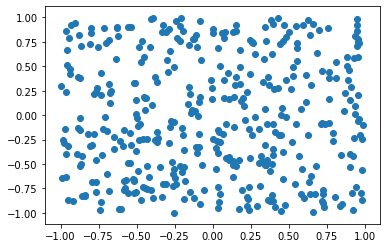

In [16]:
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.show()

#### Create Particles

In [17]:
particles = np.random.uniform(-1, 1, (Np, Nc, Nd))
print(particles.shape)

(10, 2, 2)


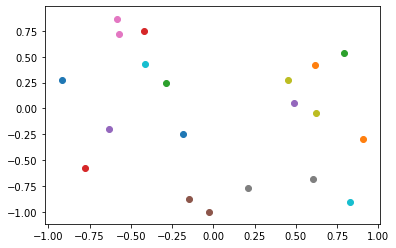

In [18]:
plt.figure()
for particle in particles:
    plt.scatter(particle[:,0], particle[:, 1])
plt.show()

### Artificial Dataset

#### PSO Algorithm

In [19]:
def PSO(particles, data, Np, Nc, Nd, No):
    velocities = np.zeros((Np, Nc, Nd))

    gbest_f = 0 
    gbest_x = np.zeros((Nc, Nd))
    gbest_c = np.zeros(No)

    lbest_f = np.zeros(Np)
    lbest_x = np.zeros((Np, Nc, Nd))

    for i in range(iterations):

        # Loop over all particles
        for j in range(Np):
            clusters = np.zeros(No)
            distances = np.zeros((No, Nc))

            # Loop over all data points
            for k in range(No):
                # Compute distances to all clusters
                distances[k] = [distance(data[k], m) for m in particles[j]]

                # Assign closest cluster
                clusters[k] = np.argmin(distances[k])
            
            # Compute fitness scores
            f = fitness(distances, clusters, Nc)

            # Update local best
            if(i == 0):
                lbest_f[j] = f
                lbest_x[j] = particles[j]
            else:
                if(f < lbest_f[j]):
                    lbest_f[j] = f
                    lbest_x[j] = particles[j]

        # Update global best
        if(i == 0):
            gbest_f = np.min(lbest_f)
            gbest_x = particles[np.argmin(lbest_f)]
        else:
            if(np.min(lbest_f) < gbest_f):
                gbest_f = np.min(lbest_f)
                gbest_x = particles[np.argmin(lbest_f)]

        # Update velocities 
        for j in range(Np):
            velocities[j] = update(particles[j], velocities[j], gbest_x, lbest_x[j], w, a1, a2)

        # Update particles
        particles += velocities
        
    return gbest_f, gbest_x

In [20]:
error = []
for i in range(30):
    print(f"Iteration: {i}")
    gbest_f, gbest_x = PSO(particles, data, Np, Nc, Nd, No)
    
    clusters = np.zeros(No)
    distances = np.zeros((No, Nc))

    # Loop over all data points
    for k in range(No):
        # Compute distances to all clusters
        distances[k] = [distance(data[k], m) for m in gbest_x]

        # Assign closest cluster
        clusters[k] = np.argmin(distances[k])
        
    error.append(fitness(distances, clusters, Nc))
    
print(np.mean(error))
print(np.std(error))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
0.5640322075713048
0.0013954603393552514


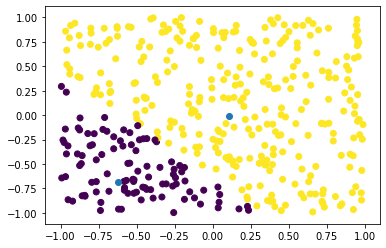

In [21]:
plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.scatter(gbest_x[:,0], gbest_x[:,1])
plt.show()

#### K-Means

In [22]:
error = []
for i in range(30):
    print(f"Iteration: {i}")
    kmeans = KMeans(n_clusters=2).fit(data)
    gbest_x = kmeans.cluster_centers_

    clusters = np.zeros(No)
    distances = np.zeros((No, Nc))

    # Loop over all data points
    for k in range(No):
        # Compute distances to all clusters
        distances[k] = [distance(data[k], m) for m in gbest_x]

        # Assign closest cluster
        clusters[k] = np.argmin(distances[k])

    error.append(fitness(distances, clusters, Nc))

print(np.mean(error))
print(np.std(error))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
0.5882443574463594
7.588143726161717e-05


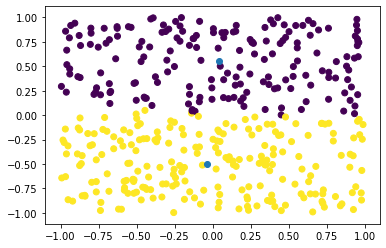

In [23]:
plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=clusters)
plt.scatter(gbest_x[:,0], gbest_x[:,1])
plt.show()

### Iris Dataset

In [24]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target

In [25]:
Nc = 3
Nd = 4
No = len(X)
Np = 10
iterations = 100

w = 0.72
a1 = 1.49
a2 = 1.49

In [26]:
particles = np.random.uniform(-1, 1, (Np, Nc, Nd))

#### PSO Algorithm

In [27]:
error = []
for i in range(30):
    print(f"Iteration: {i}")
    gbest_f, gbest_x = PSO(particles, X, Np, Nc, Nd, No)
    
    clusters = np.zeros(No)
    distances = np.zeros((No, Nc))

    # Loop over all data points
    for k in range(No):
        # Compute distances to all clusters
        distances[k] = [distance(X[k], m) for m in gbest_x]

        # Assign closest cluster
        clusters[k] = np.argmin(distances[k])
        
    error.append(fitness(distances, clusters, Nc))
    
print(np.mean(error))
print(np.std(error))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
0.6295263356284815
7.906341140512111e-07


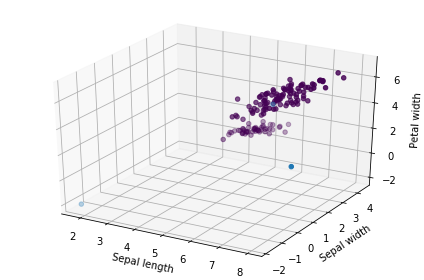

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=clusters)
ax.scatter(gbest_x[:,0], gbest_x[:,1], gbest_x[:,2])
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal width")
plt.tight_layout()
plt.show()

#### K-Means

In [29]:
error = []
for i in range(30):
    print(f"Iteration: {i}")
    kmeans = KMeans(n_clusters=Nc).fit(X)
    gbest_x = kmeans.cluster_centers_

    clusters = np.zeros(No)
    distances = np.zeros((No, Nc))

    # Loop over all data points
    for k in range(No):
        # Compute distances to all clusters
        distances[k] = [distance(X[k], m) for m in gbest_x]

        # Assign closest cluster
        clusters[k] = np.argmin(distances[k])

    error.append(fitness(distances, clusters, Nc))

print(np.mean(error))
print(np.std(error))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
0.6466205343186204
0.00029698892525998526


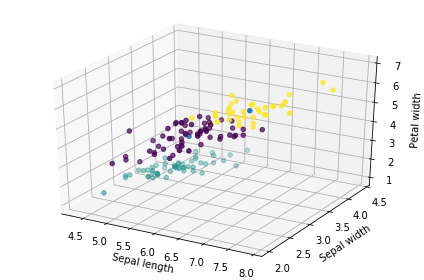

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=clusters)
ax.scatter(gbest_x[:,0], gbest_x[:,1], gbest_x[:,2])
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal width")
plt.tight_layout()
plt.show()